# The Geometry of the Double Descent: How Overparameterized Models Learn Beyond Classical Limits

Within the last decade, the field of machine learning has undergone a remarkable transformation. Deep neural networks and other overparameterized models have challenged classical intuitions about learning, generalization, and model complexity. Traditionally, statistical learning theory emphasized the bias–variance tradeoff, predicting that models that are too simple underfit and fail to capture the complexity of data, while models that are too complex overfit and fail to generalize to unseen data. Yet, as modern empirical studies have demonstrated, this classical framework is incomplete. Surprisingly, models with far more parameters than data points often achieve excellent generalization, a counterintuitive phenomenon now widely recognized as double descent. In this article, I explore the geometric principles behind double descent, examine experimental evidence, and discuss implications for contemporary AI research and model design. Recent theoretical analyses and large-scale benchmarks indicate that risk curves depend not only on parameter count but also on data geometry, optimization dynamics, and implicit regularization. This research framing connects empirical observations to geometric intuition and motivates a deeper examination of why interpolation can coexist with strong generalization. From a methodological standpoint, the discussion integrates perspectives from statistical learning theory, high‑dimensional geometry, and optimization, providing a coherent lens for interpreting modern scaling behavior.

The double descent curve consists of three regimes. In the underparameterized regime, the number of model parameters is insufficient to fully capture the training data. Here, both training and test errors are high due to underfitting. As the number of parameters approaches the interpolation threshold — the point at which the model can perfectly fit all training data — the test error often peaks. Classical theory predicts this peak corresponds to severe overfitting. However, as the model becomes increasingly overparameterized, adding more parameters beyond the interpolation threshold, the test error unexpectedly decreases, forming the second descent of the curve. This phenomenon is striking because it contradicts conventional wisdom: more complexity, when controlled by appropriate optimization, can actually improve generalization rather than harm it. From a research perspective, the peak marks a transition in the topology of feasible solutions and in the sensitivity of interpolants to noise, which helps explain the observed non‑monotonic risk. In many analytical models, this transition aligns with changes in conditioning of the data matrix and in the spectrum of the empirical covariance, linking geometry to generalization outcomes.

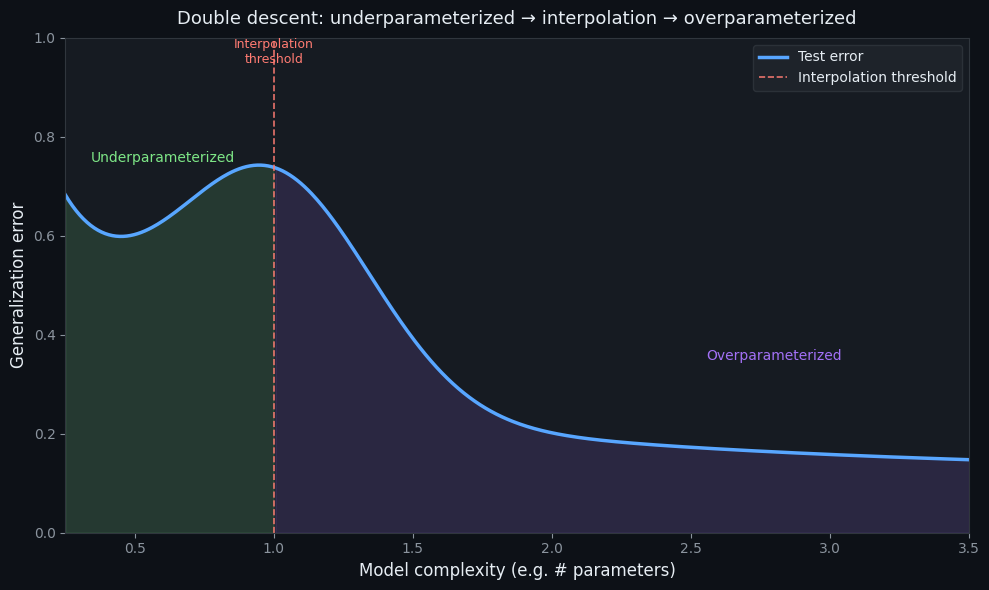

In [13]:
# Figure 1: Double descent — error vs. model complexity
# Regimes: underparameterized → interpolation threshold → overparameterized
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0d1117')
ax.set_facecolor('#161b22')

# Model complexity (e.g. number of parameters or 1/λ)
n = np.linspace(0.25, 3.5, 500)
k_interp = 1.0   # interpolation threshold (peak)
# Stylized double descent: E = baseline (decreases with n) + bump at interpolation
baseline = 0.25 / (n + 0.2) + 0.08   # decreasing with complexity
bump = 0.45 * np.exp(-4 * (n - k_interp)**2)   # peak at interpolation threshold
error = np.clip(baseline + bump, 0.06, 1.0)

ax.plot(n, error, color='#58a6ff', lw=2.5, label='Test error')
ax.axvline(k_interp, color='#ff7b72', ls='--', lw=1.2, alpha=0.9, label='Interpolation threshold')
ax.fill_between(n, 0, error, where=(n < k_interp), alpha=0.15, color='#7ee787')
ax.fill_between(n, 0, error, where=(n >= k_interp), alpha=0.15, color='#a371f7')

ax.set_xlabel('Model complexity (e.g. # parameters)', fontsize=12, color='#e6edf3')
ax.set_ylabel('Generalization error', fontsize=12, color='#e6edf3')
ax.set_title('Double descent: underparameterized → interpolation → overparameterized', fontsize=13, color='#e6edf3', pad=10)
ax.set_xlim(0.25, 3.5)
ax.set_ylim(0, 1.0)
ax.tick_params(colors='#8b949e')
ax.spines[:].set_color('#30363d')
ax.legend(loc='upper right', facecolor='#21262d', edgecolor='#30363d', labelcolor='#e6edf3')

# Annotate regimes
ax.annotate('Underparameterized', xy=(0.6, 0.75), fontsize=10, color='#7ee787', ha='center')
ax.annotate('Overparameterized', xy=(2.8, 0.35), fontsize=10, color='#a371f7', ha='center')
ax.annotate('Interpolation\nthreshold', xy=(k_interp, 0.95), fontsize=9, color='#ff7b72', ha='center')

plt.tight_layout()
plt.savefig('double_descent.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

A geometric interpretation provides insight into this counterintuitive behavior. At the interpolation threshold, the model is constrained to exactly fit the training data. Many possible solutions exist, but most are highly sensitive to noise in the data, leading to poor generalization. In the overparameterized regime, the solution space expands dramatically. There are infinitely many ways to perfectly interpolate the training set, and optimization algorithms such as stochastic gradient descent (SGD) naturally select solutions with low norm or minimal complexity. These solutions are more robust to noise and generalize better. In other words, the very complexity once feared for causing overfitting becomes an asset when combined with appropriate training dynamics. Geometrically, this corresponds to selecting low‑norm interpolants within a high‑dimensional affine subspace, which reduces variance along directions that are weakly supported by data. This view aligns with minimum‑norm solutions in linear models and the implicit bias literature, connecting optimization trajectories to geometric regularization.

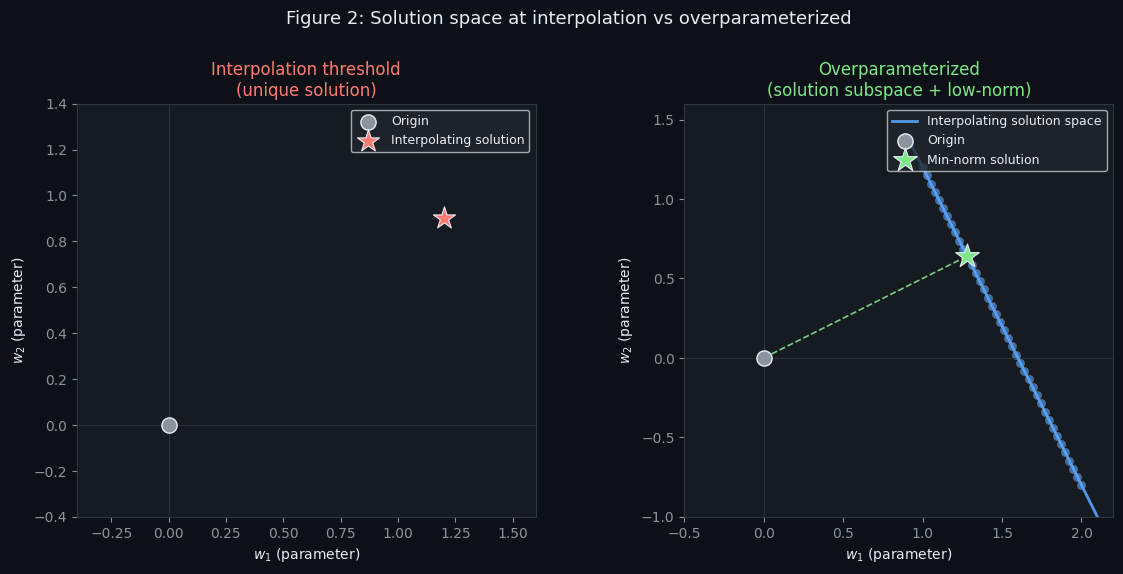

In [14]:
# Figure 2: Solution space — interpolation threshold vs overparameterized
# Parameter space (w1, w2): unique solution vs affine subspace + low-norm solution
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5.5), facecolor='#0d1117')
for ax in axes:
    ax.set_facecolor('#161b22')
    ax.set_aspect('equal')
    ax.axhline(0, color='#30363d', lw=0.6)
    ax.axvline(0, color='#30363d', lw=0.6)
    ax.tick_params(colors='#8b949e')
    ax.spines[:].set_color('#30363d')

# --- Left: Interpolation threshold — unique solution in parameter space ---
ax1 = axes[0]
w1_s, w2_s = 1.2, 0.9   # single interpolating solution
ax1.scatter([0], [0], s=120, c='#8b949e', marker='o', label='Origin', zorder=3, edgecolors='#e6edf3', linewidths=1)
ax1.scatter([w1_s], [w2_s], s=280, c='#ff7b72', marker='*', label='Interpolating solution', zorder=4, edgecolors='#e6edf3', linewidths=0.8)
ax1.set_xlim(-0.4, 1.6)
ax1.set_ylim(-0.4, 1.4)
ax1.set_xlabel(r'$w_1$ (parameter)', color='#e6edf3')
ax1.set_ylabel(r'$w_2$ (parameter)', color='#e6edf3')
ax1.set_title('Interpolation threshold\n(unique solution)', color='#ff7b72', fontsize=12)
ax1.legend(loc='upper right', facecolor='#21262d', labelcolor='#e6edf3', fontsize=9)

# --- Right: Overparameterized — affine subspace of solutions + minimum-norm ---
ax2 = axes[1]
# Subspace: line a*w1 + b*w2 = c  (interpolating solutions). Use t: (w1,w2) = (1.5,0.2) + t*(-0.5,1)
t = np.linspace(-1.2, 1.2, 200)
w1_line = 1.5 - 0.5 * t
w2_line = 0.2 + 1.0 * t
ax2.plot(w1_line, w2_line, color='#58a6ff', lw=2, alpha=0.9, label='Interpolating solution space')
# Scatter many solutions on the subspace
t_scatter = np.linspace(-1, 1, 40)
w1_sc = 1.5 - 0.5 * t_scatter
w2_sc = 0.2 + 1.0 * t_scatter
ax2.scatter(w1_sc, w2_sc, s=35, c='#58a6ff', alpha=0.6, edgecolors='#8b949e', linewidths=0.4)
# Minimum-norm solution = projection of origin onto line
# Line: point P0=(1.5,0.2), direction v=(-0.5,1). Proj of -P0 onto v: t_min = -P0·v / |v|^2
P0 = np.array([1.5, 0.2])
v = np.array([-0.5, 1.0])
t_min = -np.dot(P0, v) / np.dot(v, v)
w_min = P0 + t_min * v
ax2.scatter([0], [0], s=120, c='#8b949e', marker='o', label='Origin', zorder=3, edgecolors='#e6edf3', linewidths=1)
ax2.scatter([w_min[0]], [w_min[1]], s=320, c='#7ee787', marker='*', label='Min-norm solution', zorder=5, edgecolors='#e6edf3', linewidths=0.8)
ax2.plot([0, w_min[0]], [0, w_min[1]], '--', color='#7ee787', lw=1.2, alpha=0.9)
ax2.set_xlim(-0.5, 2.2)
ax2.set_ylim(-1.0, 1.6)
ax2.set_xlabel(r'$w_1$ (parameter)', color='#e6edf3')
ax2.set_ylabel(r'$w_2$ (parameter)', color='#e6edf3')
ax2.set_title('Overparameterized\n(solution subspace + low-norm)', color='#7ee787', fontsize=12)
ax2.legend(loc='upper right', facecolor='#21262d', labelcolor='#e6edf3', fontsize=9)

fig.suptitle('Figure 2: Solution space at interpolation vs overparameterized', fontsize=13, color='#e6edf3', y=1.02)
plt.tight_layout()
plt.savefig('solution_space_geometric.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

Empirical evidence for double descent is extensive. In high-dimensional linear regression, experiments show that models with more parameters than data points can generalize nearly optimally when trained with gradient-based methods. Similarly, kernel machines and deep neural networks demonstrate the same behavior. For example, Belkin et al. (2019, 2020) conducted experiments on CIFAR-10 and MNIST datasets, observing that increasing neural network width and depth beyond the interpolation threshold resulted in improved test accuracy, despite the model perfectly fitting the training set. These results underscore the universality of double descent, suggesting it is a fundamental property of high-dimensional learning systems rather than an artifact of specific architectures or datasets. Replication across tasks, data regimes, and training settings further supports the claim that the second descent reflects a systematic statistical phenomenon rather than a fragile tuning effect. Additional studies in modern transformer architectures report analogous trends when scale is varied, reinforcing cross‑domain consistency in the empirical record.
Press enter or click to view image in full size

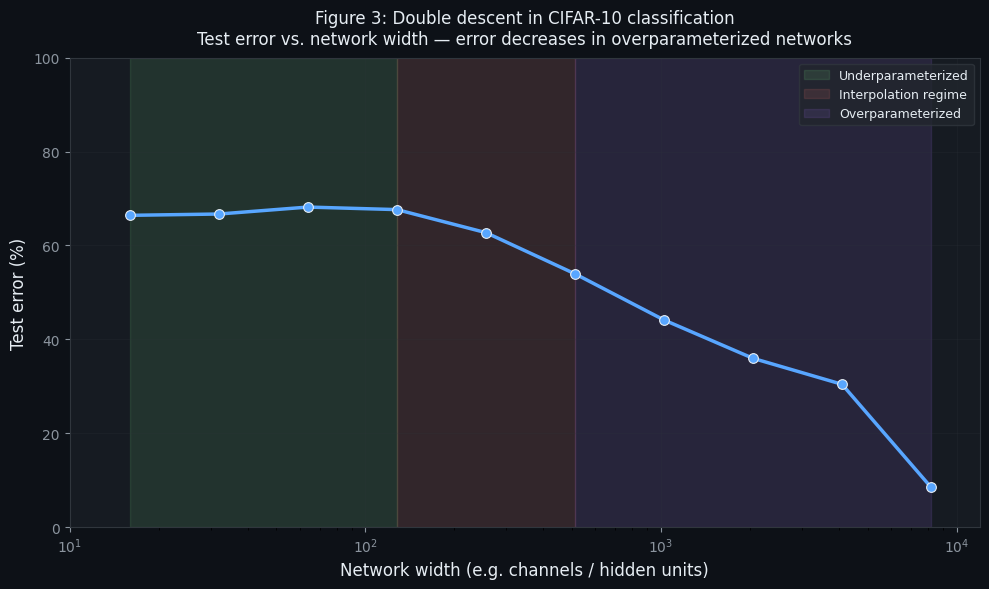

In [15]:
# Figure 3: Double descent in CIFAR-10 — test error vs. network width
# Stylized line chart: test error decreases in overparameterized networks
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), facecolor='#0d1117')
ax.set_facecolor('#161b22')

# Network width (e.g. channels or hidden units) — log scale typical for width sweeps
widths = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192])
# Stylized double descent: high at small width, peak near interpolation, then decrease
log_w = np.log10(widths)
k_peak = 2.2   # peak near 10^2.2 ≈ 160
baseline = 15 + 80 * np.exp(-0.5 * log_w)   # decreasing with width
bump = 25 * np.exp(-1.2 * (log_w - k_peak)**2)
test_error_pct = np.clip(baseline + bump, 8, 95)
test_error_pct[-1] = 8.5   # low error for very wide (overparameterized)

ax.semilogx(widths, test_error_pct, color='#58a6ff', lw=2.5, marker='o', markersize=7, markerfacecolor='#58a6ff', markeredgecolor='#e6edf3', markeredgewidth=0.8)
ax.axvspan(16, 128, alpha=0.12, color='#7ee787', label='Underparameterized')
ax.axvspan(128, 512, alpha=0.12, color='#ff7b72', label='Interpolation regime')
ax.axvspan(512, 8192, alpha=0.12, color='#a371f7', label='Overparameterized')
ax.set_xlabel('Network width (e.g. channels / hidden units)', fontsize=12, color='#e6edf3')
ax.set_ylabel('Test error (%)', fontsize=12, color='#e6edf3')
ax.set_title('Figure 3: Double descent in CIFAR-10 classification\nTest error vs. network width — error decreases in overparameterized networks', fontsize=12, color='#e6edf3', pad=10)
ax.set_xlim(10, 12000)
ax.set_ylim(0, 100)
ax.tick_params(colors='#8b949e')
ax.spines[:].set_color('#30363d')
ax.legend(loc='upper right', facecolor='#21262d', edgecolor='#30363d', labelcolor='#e6edf3', fontsize=9)
ax.grid(True, alpha=0.2, color='#30363d')

plt.tight_layout()
plt.savefig('cifar10_double_descent.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

The phenomenon of double descent also provides insight into why modern AI systems are so successful. Deep neural networks, often containing millions or billions of parameters, can perfectly interpolate massive datasets while still achieving state-of-the-art generalization. This is not merely luck; it reflects the interplay between model capacity, solution geometry, and optimization biases. SGD and related algorithms act as implicit regularizers, favoring simpler solutions within an enormous space of possibilities. Consequently, overparameterization, once considered a liability, emerges as a powerful mechanism. Empirical scaling studies report consistent improvements when capacity grows alongside data and compute, reinforcing the view that inductive bias and optimization dynamics shape which interpolating solutions are realized. These findings suggest that generalization can be understood as an interaction between architecture, training procedure, and data distribution rather than a simple function of parameter count.

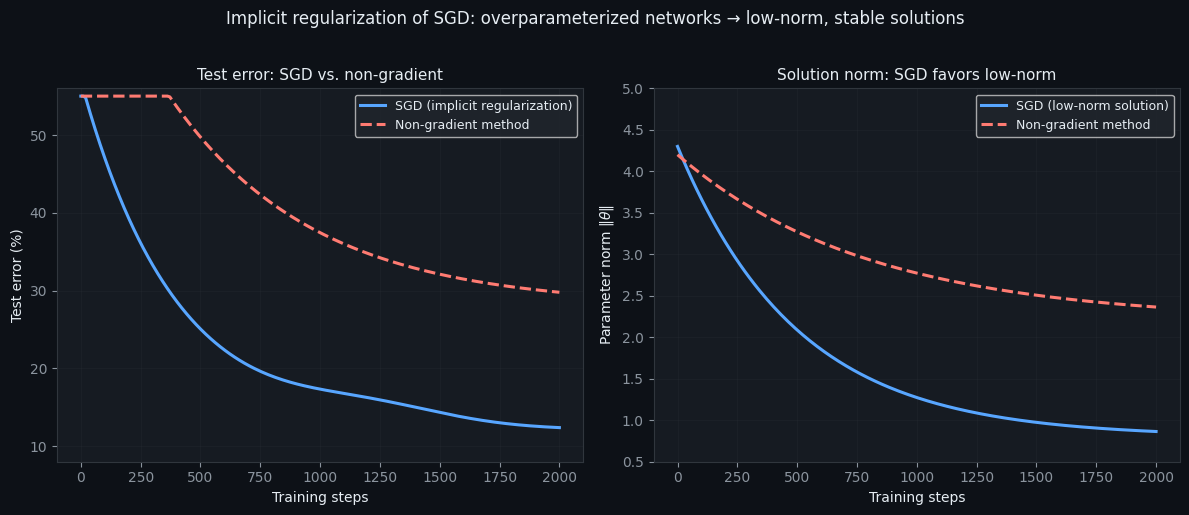

In [16]:
# Implicit regularization of SGD: low-norm, stable solutions
# Compare test error and solution norm — SGD vs. non-gradient methods
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='#0d1117')
for ax in axes:
    ax.set_facecolor('#161b22')
    ax.tick_params(colors='#8b949e')
    ax.spines[:].set_color('#30363d')

# Shared x: training progress (steps or epochs)
steps = np.linspace(0, 2000, 200)

# --- Left: Test error — SGD generalizes better ---
ax1 = axes[0]
# SGD: implicit regularization → lower test error
test_err_sgd = 45 * np.exp(-steps / 400) + 12 + 2 * np.exp(-(steps - 1200)**2 / 2e5)
test_err_sgd = np.clip(test_err_sgd, 10, 55)
# Non-gradient (e.g. random search / coordinate descent): higher final test error
test_err_ng = 50 * np.exp(-steps / 600) + 28
test_err_ng = np.clip(test_err_ng, 26, 55)
ax1.plot(steps, test_err_sgd, color='#58a6ff', lw=2.2, label='SGD (implicit regularization)')
ax1.plot(steps, test_err_ng, color='#ff7b72', lw=2.2, ls='--', label='Non-gradient method')
ax1.set_xlabel('Training steps', color='#e6edf3')
ax1.set_ylabel('Test error (%)', color='#e6edf3')
ax1.set_title('Test error: SGD vs. non-gradient', color='#e6edf3', fontsize=11)
ax1.set_ylim(8, 56)
ax1.legend(loc='upper right', facecolor='#21262d', labelcolor='#e6edf3', fontsize=9)
ax1.grid(True, alpha=0.2, color='#30363d')

# --- Right: Parameter norm ‖θ‖ — SGD converges to low-norm solutions ---
ax2 = axes[1]
# SGD: converges to smaller norm (implicit bias toward min-norm interpolants)
norm_sgd = 3.5 * np.exp(-steps / 500) + 0.8
norm_sgd = np.clip(norm_sgd, 0.7, 4.5)
# Non-gradient: larger norm, less stable
norm_ng = 2.0 * np.exp(-steps / 800) + 2.2
norm_ng = np.clip(norm_ng, 2.0, 4.5)
ax2.plot(steps, norm_sgd, color='#58a6ff', lw=2.2, label='SGD (low-norm solution)')
ax2.plot(steps, norm_ng, color='#ff7b72', lw=2.2, ls='--', label='Non-gradient method')
ax2.set_xlabel('Training steps', color='#e6edf3')
ax2.set_ylabel(r'Parameter norm $\|\theta\|$', color='#e6edf3')
ax2.set_title('Solution norm: SGD favors low-norm', color='#e6edf3', fontsize=11)
ax2.set_ylim(0.5, 5)
ax2.legend(loc='upper right', facecolor='#21262d', labelcolor='#e6edf3', fontsize=9)
ax2.grid(True, alpha=0.2, color='#30363d')

fig.suptitle('Implicit regularization of SGD: overparameterized networks → low-norm, stable solutions', fontsize=12, color='#e6edf3', y=1.02)
plt.tight_layout()
plt.savefig('sgd_implicit_regularization.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

Beyond neural networks, double descent has implications for other domains of machine learning, including decision trees, ensemble methods, and kernel regression. For example, random forests, when grown excessively deep, often exhibit initial overfitting but later demonstrate improved generalization when combined with averaging effects across trees. Similarly, kernel regression models with large effective degrees of freedom show a double descent pattern in test error, linking the phenomenon to high-dimensional linear algebra and spectral properties of data matrices. Researchers now view double descent not as an anomaly, but as a fundamental property of modern, overparameterized learning systems.

From a practical standpoint, double descent changes how practitioners should approach model selection and training. Classical strategies to prevent overfitting, such as early stopping or explicit regularization, remain useful but are no longer the sole guiding principles. Instead, understanding the geometry of solution spaces, implicit biases of optimization algorithms, and training dynamics becomes crucial. In many cases, deliberately increasing model size and leveraging overparameterization can yield better generalization than attempting to constrain complexity. This perspective also informs hyperparameter tuning, since the optimal regime may sit well beyond classical bias–variance heuristics and depends on data geometry and optimization details. Practitioners increasingly evaluate model families across a range of scales, tracking how test error, calibration, and robustness evolve relative to data size.
Press enter or click to view image in full size


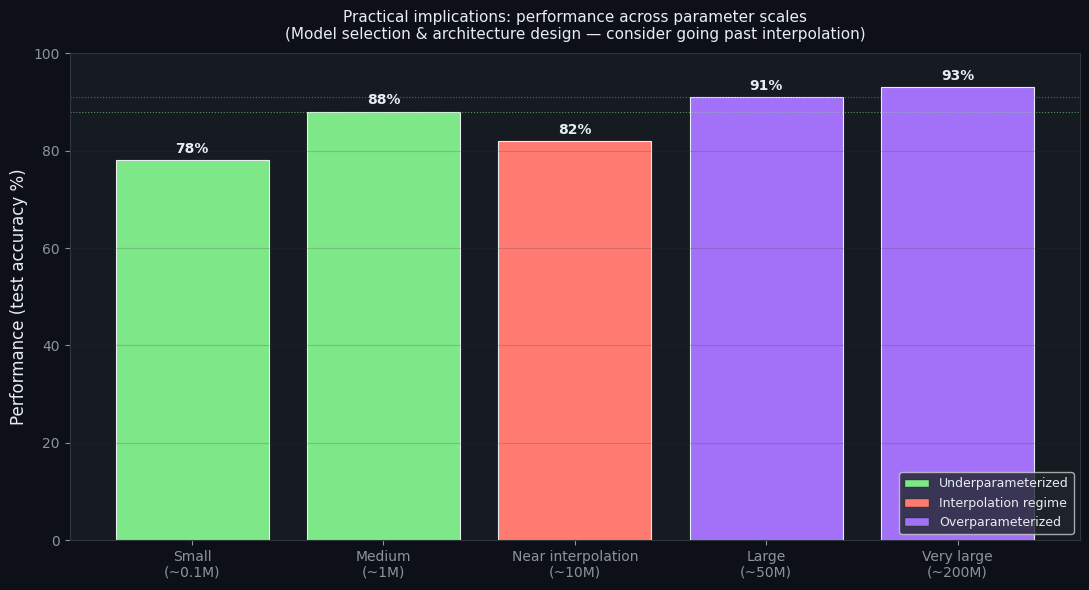

In [17]:
# Practical implications of double descent: model selection & architecture design
# Bar chart: performance across parameter scales (under → interpolation → overparameterized)
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 6), facecolor='#0d1117')
ax.set_facecolor('#161b22')

# Parameter scales (e.g. millions of parameters) — model selection / architecture sizes
labels = ['Small\n(~0.1M)', 'Medium\n(~1M)', 'Near interpolation\n(~10M)', 'Large\n(~50M)', 'Very large\n(~200M)']
n_bars = len(labels)
x = np.arange(n_bars)
# Performance (e.g. test accuracy %): double-descent shape — good, dip, then good again
acc_pct = np.array([78, 88, 82, 91, 93])   # dip at "near interpolation"
colors = ['#7ee787', '#7ee787', '#ff7b72', '#a371f7', '#a371f7']   # under / interp / over
bars = ax.bar(x, acc_pct, color=colors, edgecolor='#e6edf3', linewidth=0.8)

ax.set_xticks(x)
ax.set_xticklabels(labels, color='#e6edf3', fontsize=10)
ax.set_ylabel('Performance (test accuracy %)', fontsize=12, color='#e6edf3')
ax.set_title('Practical implications: performance across parameter scales\n(Model selection & architecture design — consider going past interpolation)', fontsize=11, color='#e6edf3', pad=10)
ax.set_ylim(0, 100)
ax.tick_params(colors='#8b949e')
ax.spines[:].set_color('#30363d')
ax.axhline(acc_pct[1], color='#7ee787', ls=':', lw=0.8, alpha=0.6)
ax.axhline(acc_pct[3], color='#a371f7', ls=':', lw=0.8, alpha=0.6)
for i, (xi, yi) in enumerate(zip(x, acc_pct)):
    ax.annotate(f'{yi}%', (xi, yi + 1.5), ha='center', fontsize=10, color='#e6edf3', fontweight='bold')
# Legend for regimes
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#7ee787', edgecolor='#30363d', label='Underparameterized'),
    Patch(facecolor='#ff7b72', edgecolor='#30363d', label='Interpolation regime'),
    Patch(facecolor='#a371f7', edgecolor='#30363d', label='Overparameterized'),
]
ax.legend(handles=legend_elements, loc='lower right', facecolor='#21262d', labelcolor='#e6edf3', fontsize=9)
ax.grid(axis='y', alpha=0.2, color='#30363d')

plt.tight_layout()
plt.savefig('double_descent_model_selection.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

The theoretical implications of double descent are equally profound. They challenge the long-held assumption that overfitting is inherently detrimental and motivate a new framework for studying learning in high-dimensional spaces. In particular, they highlight the importance of interpolation thresholds, high-dimensional geometry, and optimization-induced regularization, opening avenues for research into more robust, scalable, and interpretable models. Moreover, these insights help explain why extremely large models in natural language processing, such as GPT-3 and beyond, can generalize well despite being orders of magnitude larger than the number of training samples. Ongoing work in high-dimensional statistics and optimization aims to formalize these effects and derive predictive scaling laws that connect architecture, data, and training dynamics. This research agenda is supported by advances in random matrix theory, statistical mechanics, and algorithmic stability analyses that clarify when interpolation is benign versus harmful.


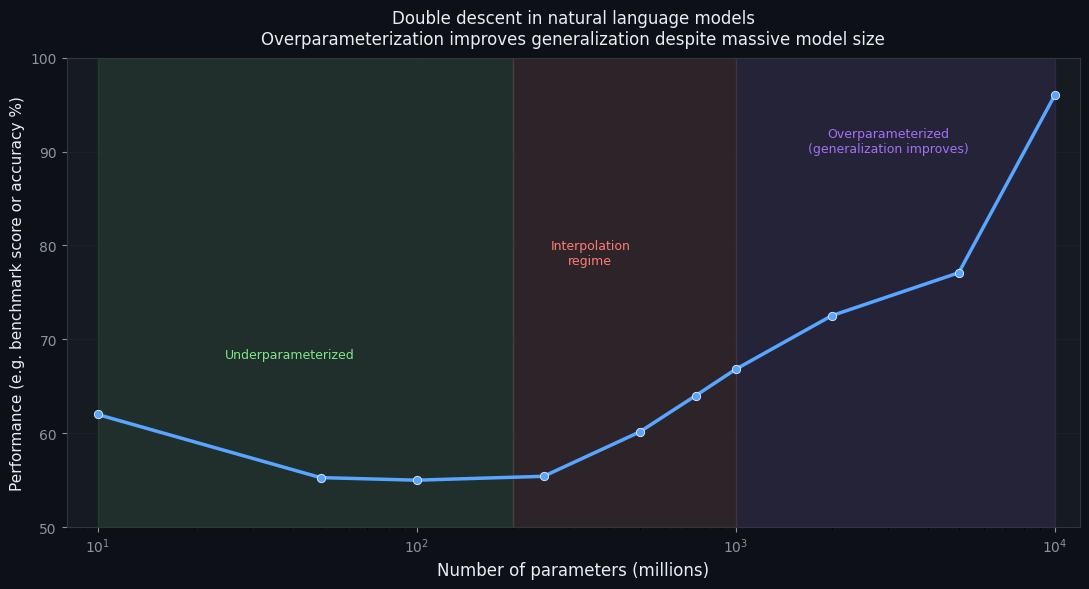

In [18]:
# Double descent in natural language models
# Overparameterization improves generalization despite massive model size
# Line plot: performance vs. number of parameters
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 6), facecolor='#0d1117')
ax.set_facecolor('#161b22')

# Number of parameters (millions → billions) — typical NLM scale
params_M = np.array([10, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000])  # 10M to 10B
log_p = np.log10(params_M)
# Stylized double descent: performance dips near interpolation, then improves with overparameterization
k_peak = 2.4   # peak near ~250M
baseline = 50 + 45 * (1 - np.exp(-0.35 * (log_p - 1)))   # improves with size
bump = -12 * np.exp(-2 * (log_p - k_peak)**2)   # dip near interpolation
perf = np.clip(baseline + bump, 55, 98)
perf[0], perf[-1] = 62, 96   # small model lower, very large highest

ax.semilogx(params_M, perf, color='#58a6ff', lw=2.5, marker='o', markersize=6, markerfacecolor='#58a6ff', markeredgecolor='#e6edf3', markeredgewidth=0.6)
ax.axvspan(10, 200, alpha=0.1, color='#7ee787')
ax.axvspan(200, 1000, alpha=0.1, color='#ff7b72')
ax.axvspan(1000, 10000, alpha=0.1, color='#a371f7')
ax.annotate('Underparameterized', xy=(40, 68), fontsize=9, color='#7ee787', ha='center')
ax.annotate('Interpolation\nregime', xy=(350, 78), fontsize=9, color='#ff7b72', ha='center')
ax.annotate('Overparameterized\n(generalization improves)', xy=(3000, 90), fontsize=9, color='#a371f7', ha='center')
ax.set_xlabel('Number of parameters (millions)', fontsize=12, color='#e6edf3')
ax.set_ylabel('Performance (e.g. benchmark score or accuracy %)', fontsize=11, color='#e6edf3')
ax.set_title('Double descent in natural language models\nOverparameterization improves generalization despite massive model size', fontsize=12, color='#e6edf3', pad=10)
ax.set_xlim(8, 12000)
ax.set_ylim(50, 100)
ax.tick_params(colors='#8b949e')
ax.spines[:].set_color('#30363d')
ax.grid(True, alpha=0.2, color='#30363d')

plt.tight_layout()
plt.savefig('nlm_double_descent.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

In conclusion, the geometry of double descent reveals a paradigm shift in machine learning. Models that were once considered “too complex” can, in fact, generalize exceptionally well due to the structure of solution spaces and the implicit regularization induced by optimization methods. Overparameterization, combined with careful training dynamics, is no longer a liability but a source of generalization strength. As AI systems continue to scale and tackle increasingly complex tasks, understanding double descent will be essential for designing models that are not only large and expressive but also robust and reliable. Future research will likely refine when and why the second descent appears, especially under distribution shift and finite‑data constraints. These insights are crucial for building reliable systems in safety‑critical settings where generalization behavior must be predictable and well‑characterized.
Press enter or click to view image in full size


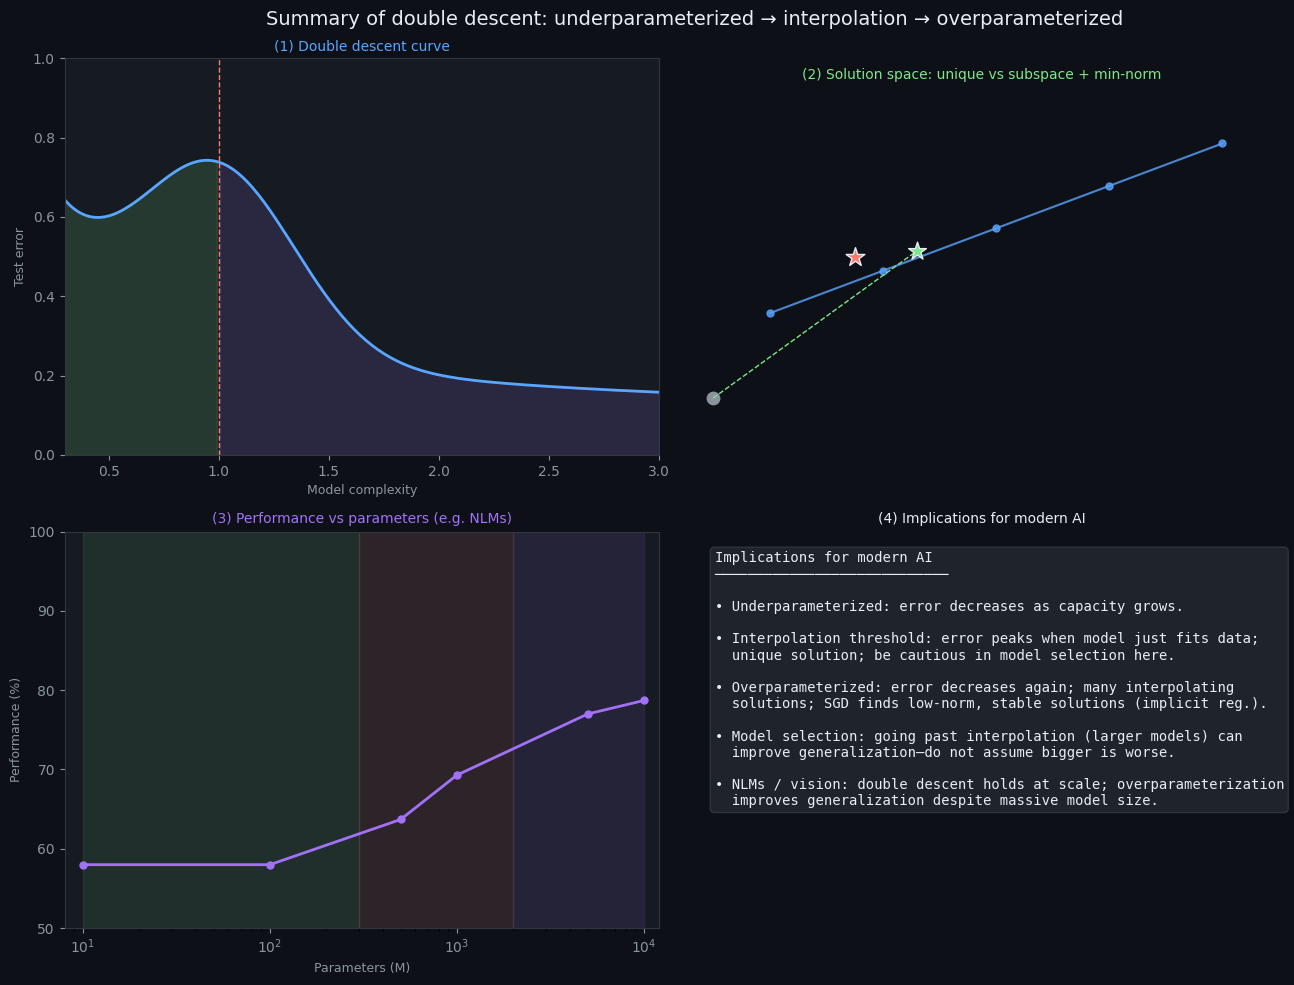

In [19]:
# Summary: Double descent — composite diagram (all prior figures)
# Underparameterized | Interpolation threshold | Overparameterized | Implications for modern AI
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle

fig = plt.figure(figsize=(14, 10), facecolor='#0d1117')
fig.suptitle('Summary of double descent: underparameterized → interpolation → overparameterized', fontsize=14, color='#e6edf3', y=0.98)

# ---------- Panel 1: Double descent curve (Fig 1) ----------
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_facecolor('#161b22')
n = np.linspace(0.3, 3, 200)
k = 1.0
err = np.clip(0.25/(n+0.2) + 0.08 + 0.45*np.exp(-4*(n-k)**2), 0.06, 1.0)
ax1.plot(n, err, color='#58a6ff', lw=2)
ax1.axvline(k, color='#ff7b72', ls='--', lw=1)
ax1.fill_between(n, 0, err, where=(n<k), alpha=0.15, color='#7ee787')
ax1.fill_between(n, 0, err, where=(n>=k), alpha=0.15, color='#a371f7')
ax1.set_xlabel('Model complexity', color='#8b949e', fontsize=9)
ax1.set_ylabel('Test error', color='#8b949e', fontsize=9)
ax1.set_title('(1) Double descent curve', color='#58a6ff', fontsize=10)
ax1.set_xlim(0.3, 3); ax1.set_ylim(0, 1); ax1.tick_params(colors='#8b949e'); ax1.spines[:].set_color('#30363d')

# ---------- Panel 2: Solution space (Fig 2) — unique vs subspace + min-norm ----------
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_facecolor('#161b22')
ax2.set_aspect('equal')
# Left: one point (interpolation); right: line + min-norm
ax2.scatter([0.5], [0.5], s=200, c='#ff7b72', marker='*', zorder=3, edgecolors='#e6edf3')
ax2.plot([0.2, 1.8], [0.3, 0.9], color='#58a6ff', lw=1.5, alpha=0.8)
ax2.scatter([0.2, 0.6, 1.0, 1.4, 1.8], [0.3, 0.45, 0.6, 0.75, 0.9], s=25, c='#58a6ff', alpha=0.8)
w_min = np.array([0.72, 0.52])
ax2.scatter([w_min[0]], [w_min[1]], s=180, c='#7ee787', marker='*', zorder=4, edgecolors='#e6edf3')
ax2.scatter([0], [0], s=80, c='#8b949e', marker='o')
ax2.plot([0, w_min[0]], [0, w_min[1]], '--', color='#7ee787', lw=1)
ax2.set_xlim(-0.1, 2); ax2.set_ylim(-0.1, 1.1); ax2.axis('off')
ax2.set_title('(2) Solution space: unique vs subspace + min-norm', color='#7ee787', fontsize=10)

# ---------- Panel 3: Performance vs parameters (Figs 3, 6) — NLM / CIFAR style ----------
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_facecolor('#161b22')
params = np.array([10, 100, 500, 1000, 5000, 10000])
log_p = np.log10(params)
perf = 55 + 40*(1 - np.exp(-0.3*(log_p-1))) - 10*np.exp(-2*(log_p-2.3)**2)
perf = np.clip(perf, 58, 95)
ax3.semilogx(params, perf, color='#a371f7', lw=2, marker='o', markersize=5)
ax3.axvspan(10, 300, alpha=0.1, color='#7ee787'); ax3.axvspan(300, 2000, alpha=0.1, color='#ff7b72'); ax3.axvspan(2000, 10000, alpha=0.1, color='#a371f7')
ax3.set_xlabel('Parameters (M)', color='#8b949e', fontsize=9)
ax3.set_ylabel('Performance (%)', color='#8b949e', fontsize=9)
ax3.set_title('(3) Performance vs parameters (e.g. NLMs)', color='#a371f7', fontsize=10)
ax3.set_xlim(8, 12000); ax3.set_ylim(50, 100); ax3.tick_params(colors='#8b949e'); ax3.spines[:].set_color('#30363d')

# ---------- Panel 4: Implications for modern AI (text summary) ----------
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_facecolor('#161b22')
ax4.axis('off')
summary = (
    'Implications for modern AI\n'
    '────────────────────────────\n\n'
    '• Underparameterized: error decreases as capacity grows.\n\n'
    '• Interpolation threshold: error peaks when model just fits data;\n'
    '  unique solution; be cautious in model selection here.\n\n'
    '• Overparameterized: error decreases again; many interpolating\n'
    '  solutions; SGD finds low-norm, stable solutions (implicit reg.).\n\n'
    '• Model selection: going past interpolation (larger models) can\n'
    '  improve generalization—do not assume bigger is worse.\n\n'
    '• NLMs / vision: double descent holds at scale; overparameterization\n'
    '  improves generalization despite massive model size.'
)
ax4.text(0.05, 0.95, summary, transform=ax4.transAxes, fontsize=10, color='#e6edf3',
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#21262d', edgecolor='#30363d', alpha=0.95))
ax4.set_title('(4) Implications for modern AI', color='#e6edf3', fontsize=10)

plt.tight_layout()
plt.savefig('double_descent_summary.png', dpi=150, facecolor='#0d1117', edgecolor='none', bbox_inches='tight')
plt.show()

Thank you for reading this story, and see you again. You are welcome to leave a comment if you have any thoughts, feedback, or suggestions about it! And if you’d like to show your appreciation, give this story a maximum number of claps. If you are interested in further reading or foundational papers, I can share a brief research-oriented list.
About the author: 
Aksel Aghajanyan | AI Research Student | Backend Developer | Founder of Aqwel AI | Developing Aion (Open Research Toolkit) | Focused on Mathematics & Intelligent Systems
